# Introducción a SQL

### Estructura de SQL
<img src="estructura.png" width="50%">

### Operadores en SQL
<img src="operadores.png" width="50%">

### Operadores de Comparación en SQL
<img src="operadores_comparacion.png" width="50%">

### Agregación en SQL
<img src="agregacion.png" width="50%">

### Joins en SQL
<img src="joins.jpg" width="50%">



# Consultas de SQL en Python

### Instalación de librerias

In [26]:
# !pip install sqlite3 pandas seaborn matplotlib tabulate

# Quita la almohadilla de la línea anterior para instalar las librerías necesarias

### Importar las librerias necesarias

In [27]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

### Conectar con la base de datos Chinook

( Asegurate de haber descargado la base de datos y que este en la misma carpeta que se encuentra este script. Si no esta en la misma carpeta, puedes acceder a la base de datos indicandole la ruta:  
'/Users/danteschrantz/Desktop/Data Drivers/DemoSQL/chinook.db' )

In [28]:
conn = sqlite3.connect("chinook.db")
cursor = conn.cursor()

<img src="diagrama.png" width="800px">


### 🔹 1. Listar todas las tablas disponibles

In [29]:
consulta_tablas = "SELECT name FROM sqlite_master WHERE type='table';"
tablas = cursor.execute(consulta_tablas).fetchall()
print("📌 Tablas en la base de datos:\n", [tabla[0] for tabla in tablas])

📌 Tablas en la base de datos:
 ['albums', 'sqlite_sequence', 'artists', 'customers', 'employees', 'genres', 'invoices', 'invoice_items', 'media_types', 'playlists', 'playlist_track', 'tracks', 'sqlite_stat1']


### 🔹 2. Mostrar los primeros 10 clientes

In [30]:
consulta_clientes = "SELECT * FROM customers LIMIT 10;"
df_clientes = pd.read_sql_query(consulta_clientes, conn)
print(tabulate(df_clientes, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════╤═════════════╤═════════════╤══════════════════════════════════════════════════╤══════════════════════════════════════╤═════════════════════╤═════════╤════════════════╤══════════════╤════════════════════╤════════════════════╤══════════════════════════╤════════════════╕
│    │   CustomerId │ FirstName   │ LastName    │ Company                                          │ Address                              │ City                │ State   │ Country        │ PostalCode   │ Phone              │ Fax                │ Email                    │   SupportRepId │
╞════╪══════════════╪═════════════╪═════════════╪══════════════════════════════════════════════════╪══════════════════════════════════════╪═════════════════════╪═════════╪════════════════╪══════════════╪════════════════════╪════════════════════╪══════════════════════════╪════════════════╡
│  0 │            1 │ Luís        │ Gonçalves   │ Embraer - Empresa Brasileira de Aeronáutica S.A. │ Av. Brigadeiro Faria Lima, 21

### 🔹 3. Álbumes con su respectivo artista (JOIN)

In [31]:
consulta_albums = """
SELECT albums.Title AS Album, artists.Name AS Artista
FROM albums
JOIN artists ON albums.ArtistId = artists.ArtistId
LIMIT 10;
"""
df_albums = pd.read_sql_query(consulta_albums, conn)
print("\n🎵 Álbumes con sus artistas:\n", df_albums)


🎵 Álbumes con sus artistas:
                                    Album               Artista
0  For Those About To Rock We Salute You                 AC/DC
1                      Balls to the Wall                Accept
2                      Restless and Wild                Accept
3                      Let There Be Rock                 AC/DC
4                               Big Ones             Aerosmith
5                     Jagged Little Pill     Alanis Morissette
6                               Facelift       Alice In Chains
7                         Warner 25 Anos  Antônio Carlos Jobim
8         Plays Metallica By Four Cellos          Apocalyptica
9                             Audioslave            Audioslave


### 🔹 4. Los 5 clientes que más han gastado (GROUP BY y ORDER BY)

In [32]:
consulta_top_clientes = """
SELECT customers.FirstName || ' ' || customers.LastName AS Cliente, 
       SUM(invoices.Total) AS TotalGastado
FROM customers
JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY customers.CustomerId
ORDER BY TotalGastado DESC
LIMIT 5;
"""
df_top_clientes = pd.read_sql_query(consulta_top_clientes, conn)
print("\n💰 Top 5 clientes con más gasto:\n", df_top_clientes)


💰 Top 5 clientes con más gasto:
               Cliente  TotalGastado
0         Helena Holý         49.62
1  Richard Cunningham         47.62
2          Luis Rojas         46.62
3     Ladislav Kovács         45.62
4       Hugh O'Reilly         45.62


### 🔹 5. Los 5 géneros musicales más populares

In [33]:
consulta_generos = """
SELECT genres.Name AS Genero, COUNT(*) AS NumeroDeCanciones
FROM tracks
JOIN genres ON tracks.GenreId = genres.GenreId
GROUP BY genres.GenreId
ORDER BY NumeroDeCanciones DESC
LIMIT 5;
"""
df_generos = pd.read_sql_query(consulta_generos, conn)
print("\n🎼 Top 5 géneros musicales más populares:\n", df_generos)


🎼 Top 5 géneros musicales más populares:
                Genero  NumeroDeCanciones
0                Rock               1297
1               Latin                579
2               Metal                374
3  Alternative & Punk                332
4                Jazz                130


In [ ]:
consulta_generos = """
SELECT genres.Name AS Genero, COUNT(*) AS NumeroDeCanciones
FROM tracks
JOIN genres ON tracks.GenreId = genres.GenreId
GROUP BY genres.GenreId
ORDER BY NumeroDeCanciones DESC
LIMIT 5;
"""
df_generos = pd.read_sql_query(consulta_generos, conn)
print("\n🎼 Top 5 géneros musicales más populares:\n", df_generos)

### 🔹 6. Ingresos por país (ventas totales)

In [34]:
consulta_ventas_pais = """
SELECT billingCountry AS Pais, SUM(Total) AS VentasTotales
FROM invoices
GROUP BY billingCountry
ORDER BY VentasTotales DESC;
"""
df_ventas_pais = pd.read_sql_query(consulta_ventas_pais, conn)
print("\n🌍 Ingresos por país:\n", df_ventas_pais)


🌍 Ingresos por país:
               Pais  VentasTotales
0              USA         523.06
1           Canada         303.96
2           France         195.10
3           Brazil         190.10
4          Germany         156.48
5   United Kingdom         112.86
6   Czech Republic          90.24
7         Portugal          77.24
8            India          75.26
9            Chile          46.62
10         Ireland          45.62
11         Hungary          45.62
12         Austria          42.62
13         Finland          41.62
14     Netherlands          40.62
15          Norway          39.62
16          Sweden          38.62
17          Poland          37.62
18           Italy          37.62
19         Denmark          37.62
20       Australia          37.62
21       Argentina          37.62
22           Spain          37.62
23         Belgium          37.62


### 🔹 7. Canción más cara

In [35]:
consulta_cancion_cara = """
SELECT tracks.Name AS Cancion, tracks.UnitPrice AS Precio, albums.Title AS Album
FROM tracks
JOIN albums ON tracks.AlbumId = albums.AlbumId
ORDER BY tracks.UnitPrice DESC
LIMIT 1;
"""
df_cancion_cara = pd.read_sql_query(consulta_cancion_cara, conn)
print("\n💲 Canción más cara:\n", df_cancion_cara)


💲 Canción más cara:
                                   Cancion  Precio  \
0  Battlestar Galactica: The Story So Far    1.99   

                                    Album  
0  Battlestar Galactica: The Story So Far  


### 🔹 8. Top 5 empleados que han generado más ingresos

In [36]:
consulta_top_empleados = """
SELECT employees.FirstName || ' ' || employees.LastName AS Empleado, 
       SUM(invoices.Total) AS VentasTotales
FROM employees
JOIN customers ON employees.EmployeeId = customers.SupportRepId
JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY employees.EmployeeId
ORDER BY VentasTotales DESC
LIMIT 10;
"""
df_top_empleados = pd.read_sql_query(consulta_top_empleados, conn)
print("\n🏆 Top 5 empleados con más ventas:\n", df_top_empleados)


🏆 Top 5 empleados con más ventas:
         Empleado  VentasTotales
0   Jane Peacock         833.04
1  Margaret Park         775.40
2  Steve Johnson         720.16


### 🔹 9. Gráficos 📊

In [37]:
# Configuración general de los gráficos
sns.set(style="whitegrid")

### 🔸 Gráfico de los clientes con los mayores gastos

/var/folders/xt/8w_6k8m945g2tjrzls6q21mm0000gn/T/ipykernel_2895/260922329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalGastado", y="Cliente", data=df_top_clientes, palette="viridis")


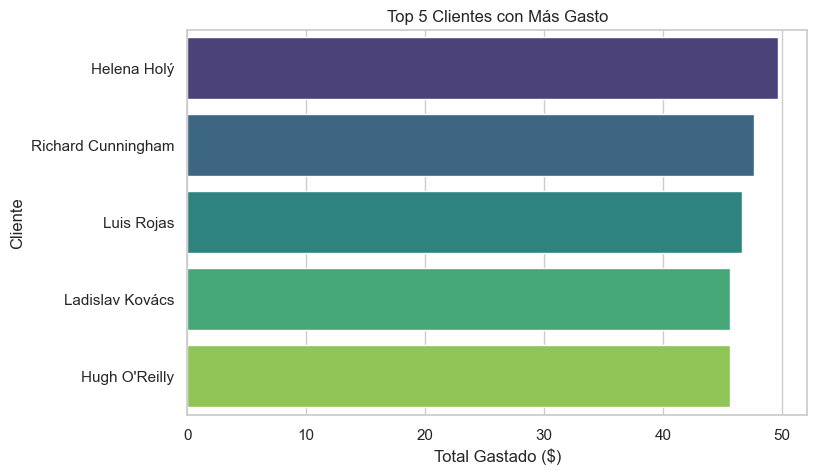

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x="TotalGastado", y="Cliente", data=df_top_clientes, palette="viridis")
plt.title("Top 5 Clientes con Más Gasto")
plt.xlabel("Total Gastado ($)")
plt.ylabel("Cliente")
plt.show()

### 🔸 Gráfico de los géneros musicales más populares

/var/folders/xt/8w_6k8m945g2tjrzls6q21mm0000gn/T/ipykernel_2895/336271500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NumeroDeCanciones", y="Genero", data=df_generos, palette="coolwarm")


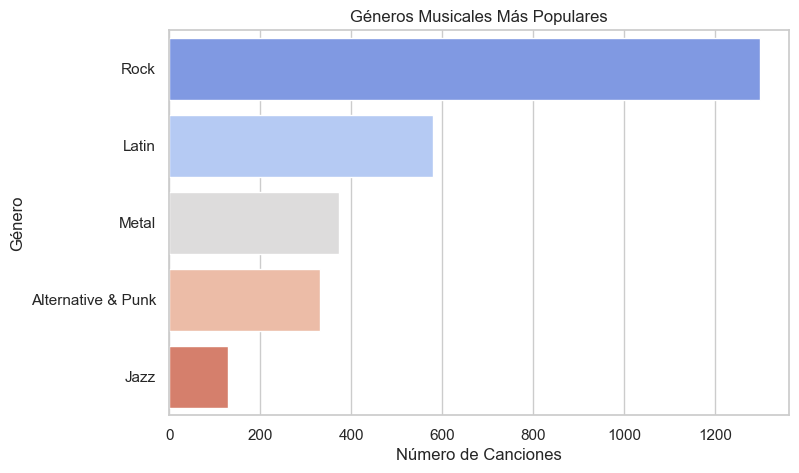

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(x="NumeroDeCanciones", y="Genero", data=df_generos, palette="coolwarm")
plt.title("Géneros Musicales Más Populares")
plt.xlabel("Número de Canciones")
plt.ylabel("Género")
plt.show()

### 🔸 Gráfico de ventas por país

/var/folders/xt/8w_6k8m945g2tjrzls6q21mm0000gn/T/ipykernel_2895/1329288984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VentasTotales", y="Pais", data=df_ventas_pais.sort_values("VentasTotales", ascending=False), palette="magma")


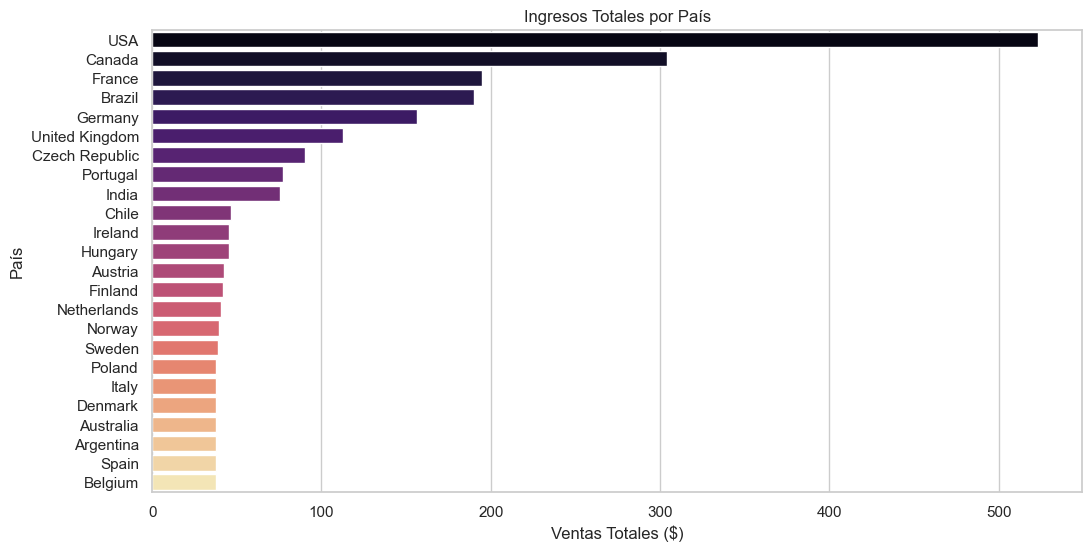

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x="VentasTotales", y="Pais", data=df_ventas_pais.sort_values("VentasTotales", ascending=False), palette="magma")
plt.title("Ingresos Totales por País")
plt.xlabel("Ventas Totales ($)")
plt.ylabel("País")
plt.show()

### 🔸 Gráfico de los empleados con más ventas

/var/folders/xt/8w_6k8m945g2tjrzls6q21mm0000gn/T/ipykernel_2895/267404514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VentasTotales", y="Empleado", data=df_top_empleados, palette="Blues_r")
/Users/danteschrantz/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


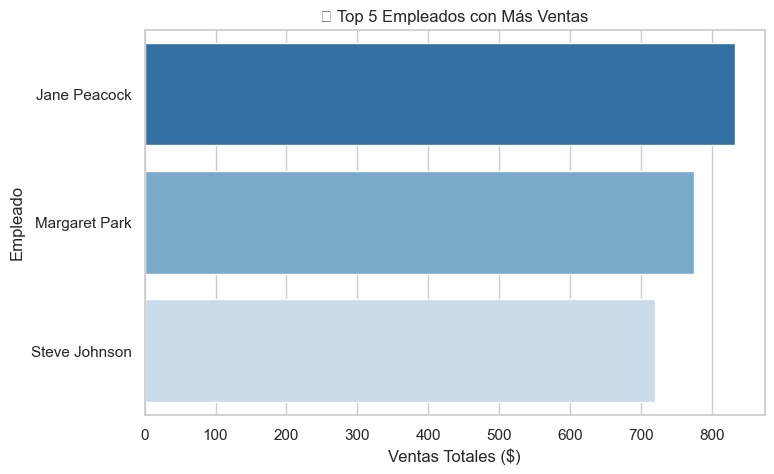

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x="VentasTotales", y="Empleado", data=df_top_empleados, palette="Blues_r")
plt.title("🏆 Top 5 Empleados con Más Ventas")
plt.xlabel("Ventas Totales ($)")
plt.ylabel("Empleado")
plt.show()

#### Cerrar la conexión a la base de datos

In [42]:
conn.close()